In [1]:
from matplotlib import pylab as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy import optimize
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
import scipy.integrate as integrate
from scipy.integrate import simps
import scipy.interpolate 
import scipy.optimize

# These defaults are the ones I like, but feel free to adapt or delete them
sns.set_style('white')
sns.set_context('talk')
#mpl.rcParams['figure.figsize'] = (10,5)

In [69]:
def get_data(fn):
    data = np.genfromtxt(fn, skip_header=1)
    detector = data[:,0] # NAN
    gamma = data[:,1]
    e_g_m = data[:,2]
    e_g_p = data[:,3]
    norm = data[:,4]
    e_n_m = data[:,5]
    e_n_p = data[:,6]
    chisq = data[:,7]
    return gamma, e_g_m, e_g_p, norm, e_n_m, e_n_p, chisq

In [148]:
# Unpack fit results
gamma_4001, e_g_m_4001, e_g_p_4001, norm_4001, e_n_m_4001, e_n_p_4001, chisq_4001 = get_data("nustar4001.txt")
gamma_4002, e_g_m_4002, e_g_p_4002, norm_4002, e_n_m_4002, e_n_p_4002, chisq_4002 = get_data("nustar4002.txt")
gamma_4003, e_g_m_4003, e_g_p_4003, norm_4003, e_n_m_4003, e_n_p_4003, chisq_4003 = get_data("nustar4003.txt")
gamma_4004, e_g_m_4004, e_g_p_4004, norm_4004, e_n_m_4004, e_n_p_4004, chisq_4004 = get_data("nustar4004.txt")
gamma_4005, e_g_m_4005, e_g_p_4005, norm_4005, e_n_m_4005, e_n_p_4005, chisq_4005 = get_data("nustar4005.txt")
gamma_6002, e_g_m_6002, e_g_p_6002, norm_6002, e_n_m_6002, e_n_p_6002, chisq_6002 = get_data("nustar6002.txt")
gamma_6003, e_g_m_6003, e_g_p_6003, norm_6003, e_n_m_6003, e_n_p_6003, chisq_6003 = get_data("nustar6003.txt")

GA = [gamma_4001[0], gamma_4002[0], gamma_4003[0], gamma_4004[0], gamma_4005[0], gamma_6002[0], gamma_6003[0]]
GB = [gamma_4001[1], gamma_4002[1], gamma_4003[1], gamma_4004[1], gamma_4005[1], gamma_6002[1], gamma_6003[1]]
GAB = [gamma_4001[2], gamma_4002[2], gamma_4003[2], gamma_4004[2], gamma_4005[2], gamma_6002[2], gamma_6003[2]]

GA_e_m = [e_g_m_4001[0], e_g_m_4002[0], e_g_m_4003[0], e_g_m_4004[0], e_g_m_4005[0], e_g_m_6002[0], e_g_m_6003[0]]
GB_e_m = [e_g_m_4001[1], e_g_m_4002[1], e_g_m_4003[1], e_g_m_4004[1], e_g_m_4005[1], e_g_m_6002[1], e_g_m_6003[1]]
GAB_e_m = [e_g_m_4001[2], e_g_m_4002[2], e_g_m_4003[2], e_g_m_4004[2], e_g_m_4005[2], e_g_m_6002[2], e_g_m_6003[2]]

GA_e_p = [e_g_p_4001[0], e_g_p_4002[0], e_g_p_4003[0], e_g_p_4004[0], e_g_p_4005[0], e_g_p_6002[0], e_g_p_6003[0]]
GB_e_p = [e_g_p_4001[1], e_g_p_4002[1], e_g_p_4003[1], e_g_p_4004[1], e_g_p_4005[1], e_g_p_6002[1], e_g_p_6003[1]]
GAB_e_p = [e_g_p_4001[2], e_g_p_4002[2], e_g_p_4003[2], e_g_p_4004[2], e_g_p_4005[2], e_g_p_6002[2], e_g_p_6003[2]]

NA = [norm_4001[0], norm_4002[0], norm_4003[0], norm_4004[0], norm_4005[0], norm_6002[0], norm_6003[0]]
NB = [norm_4001[1], norm_4002[1], norm_4003[1], norm_4004[1], norm_4005[1], norm_6002[1], norm_6003[1]]
NAB = [norm_4001[2], norm_4002[2], norm_4003[2], norm_4004[2], norm_4005[2], norm_6002[2], norm_6003[2]]

NA_e_m = [e_n_m_4001[0], e_n_m_4002[0], e_n_m_4003[0], e_n_m_4004[0], e_n_m_4005[0], e_n_m_6002[0], e_n_m_6003[0]]
NB_e_m = [e_n_m_4001[1], e_n_m_4002[1], e_n_m_4003[1], e_n_m_4004[1], e_n_m_4005[1], e_n_m_6002[1], e_n_m_6003[1]]
NAB_e_m = [e_n_m_4001[2], e_n_m_4002[2], e_n_m_4003[2], e_n_m_4004[2], e_n_m_4005[2], e_n_m_6002[2], e_n_m_6003[2]]

NA_e_p = [e_n_p_4001[0], e_n_p_4002[0], e_n_p_4003[0], e_n_p_4004[0], e_n_p_4005[0], e_n_p_6002[0], e_n_p_6003[0]]
NB_e_p = [e_n_p_4001[1], e_n_p_4002[1], e_n_p_4003[1], e_n_p_4004[1], e_n_p_4005[1], e_n_p_6002[1], e_n_p_6003[1]]
NAB_e_p = [e_n_p_4001[2], e_n_p_4002[2], e_n_p_4003[2], e_n_p_4004[2], e_n_p_4005[2], e_n_p_6002[2], e_n_p_6003[2]]

chisqA = [chisq_4001[0], chisq_4002[0], chisq_4003[0], chisq_4004[0], chisq_4005[0], chisq_6002[0], chisq_6003[0]]
chisqB = [chisq_4001[1], chisq_4002[1], chisq_4003[1], chisq_4004[1], chisq_4005[1], chisq_6002[1], chisq_6003[1]]

GC = np.subtract(GA,GB)
#print "GA = ", GA
#print "GB = ", GB
#print "GA_e_l = ",GA_e_p
#print "GA_e_u = ",GA_e_m
#print "GB_e_l = ",GB_e_p
#print "GB_e_u = ", GB_e_m
#print "NA = ", NA
#print "NB = ", NB
#print "NA_e_l = ",NA_e_m
#print "NA_e_u = ",NA_e_p
#print "NB_e_l = ",NB_e_m
#print "NB_e_u = ",NB_e_p
print "ChisqA = ", chisqA
print "ChisqB = ", chisqB

print np.divide(GB_e_p,GB)*100.

ChisqA =  [0.98787000000000003, 0.96135999999999999, 1.0224, 1.0782, 1.8110900000000001, 1.1113999999999999, 1.0978000000000001]
ChisqB =  [1.0497000000000001, 1.0162, 1.0491999999999999, 1.0612999999999999, 1.9439599999999999, 1.0488, 1.0502]
[ 1.31418575  0.65377655  0.62661956  0.79459032  0.35520331  0.868291
  0.51228487]


In [120]:
# Load data obsID 4005, Radius around source - 200 arcseconds
gamma_4005r200, e_g_m_4005r200, e_g_p_4005r200, norm_4005r200, e_n_m_4005r200, e_n_p_4005r200, chisq_4005r200 = get_data("nustar4005_r200.txt")


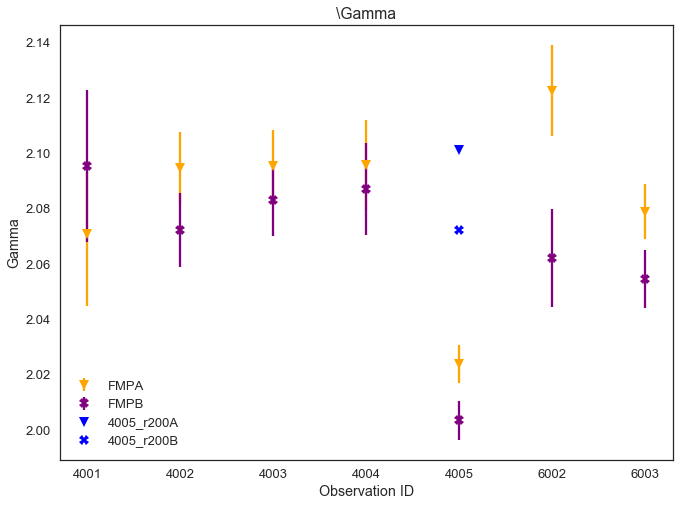

In [132]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

gamma_err_A = [GA_e_m, GA_e_p]
gamma_err_B = [GB_e_m, GB_e_p]
gamma_err_AB = [GAB_e_m, GAB_e_p]

ger200m=e_g_m_4005r200[0]
ger200p=e_g_p_4005r200[0]

err_r200=[ger200m,ger200p]

x = np.arange(7)

plt.xlabel('Observation ID')
plt.ylabel('Gamma')
plt.title(r'\Gamma')

plt.errorbar(x, GA, yerr=gamma_err_A, fmt='v', color='orange', label ='FMPA')
plt.errorbar(x, GB, yerr=gamma_err_B, fmt='X', color='purple', label ='FMPB')
#plt.errorbar(x, GAB, yerr=gamma_err_AB, fmt='.', color='blue', label ='FMPAB')
plt.errorbar(4,gamma_4005r200[0],fmt ='v', color='blue', label='4005_r200A')
plt.errorbar(4,gamma_4005r200[1],fmt ='X', color='blue', label='4005_r200B')



plt.xticks(np.arange(7), ('4001', '4002', '4003', '4004', '4005', '6002', '6003'))
plt.legend(loc=3)
  
plt.show()


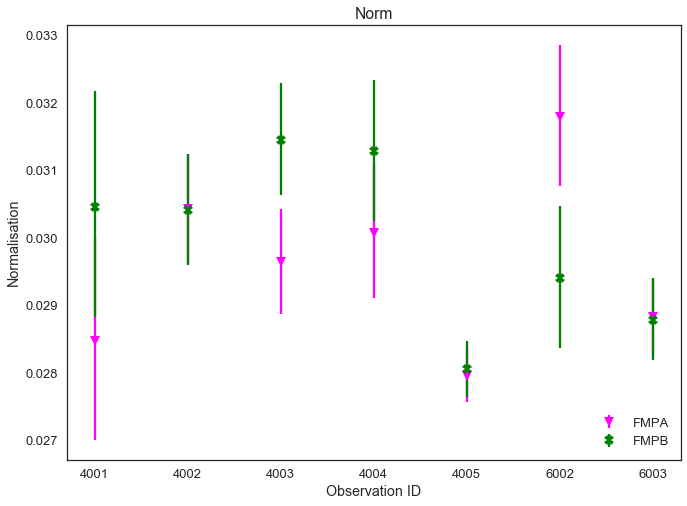

In [131]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

norm_err_A = [NA_e_m, NA_e_p]
norm_err_B = [NB_e_m, NB_e_p]
norm_err_AB = [NAB_e_m, NAB_e_p]


x = np.arange(7)

plt.xlabel('Observation ID')
plt.ylabel('Normalisation')
plt.title(r'Norm')

plt.errorbar(x, NA, yerr=norm_err_A, fmt='v', color='magenta', label ='FMPA')
plt.errorbar(x, NB, yerr=norm_err_B, fmt='X', color='green', label ='FMPB')
#plt.errorbar(x, GAB, yerr=gamma_err_AB, fmt='.', color='blue', label ='FMPAB')
#plt.errorbar(5,norm_4005r200[0],fmt ='v', color='blue', label='4005_r200A')
#plt.errorbar(5,norm_4005r200[1],fmt ='X', color='blue', label='4005_r200B')

plt.xticks(np.arange(7), ('4001', '4002', '4003', '4004', '4005', '6002', '6003'))
plt.legend(loc=4)
  
plt.show()



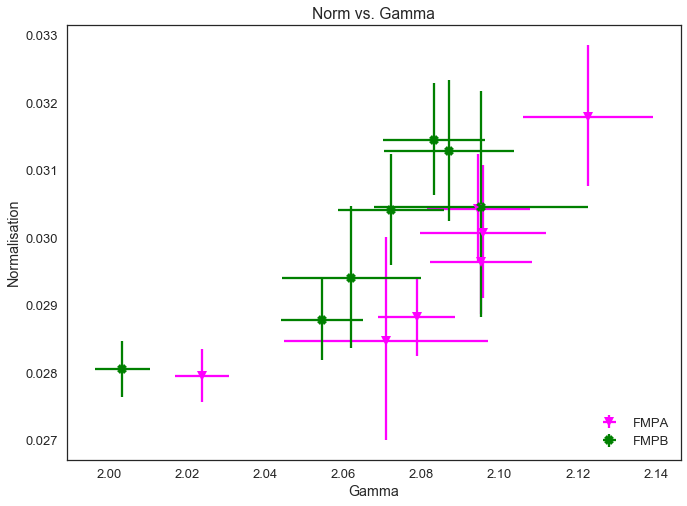

In [102]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

norm_err_A = [NA_e_m, NA_e_p]
norm_err_B = [NB_e_m, NB_e_p]
norm_err_AB = [NAB_e_m, NAB_e_p]

x = np.arange(7)

plt.xlabel('Gamma')
plt.ylabel('Normalisation')
plt.title(r'Norm vs. Gamma')

plt.errorbar(GA, NA, xerr=gamma_err_A, yerr=norm_err_A, fmt='v', color='magenta', label ='FMPA')
plt.errorbar(GB, NB, xerr=gamma_err_B, yerr=norm_err_B, fmt='X', color='green', label ='FMPB')
#plt.errorbar(x, GAB, yerr=gamma_err_AB, fmt='.', color='blue', label ='FMPAB')


#plt.xticks(np.arange(7), ('4001', '4002', '4003', '4004', '4005', '6002', '6003'))
plt.legend(loc=4)
  
plt.show()

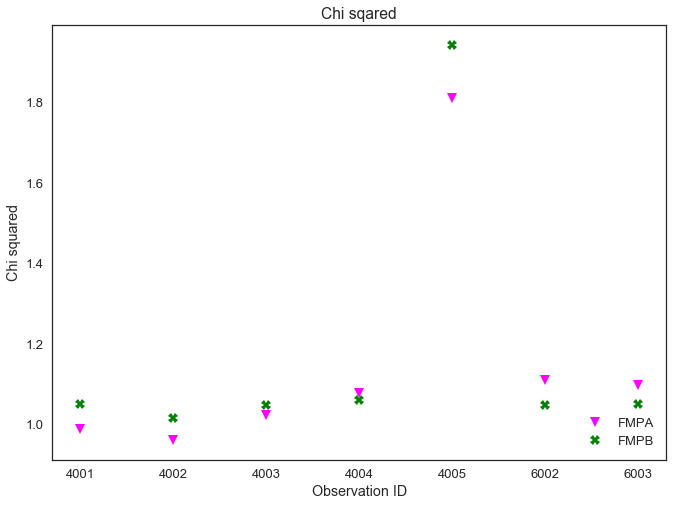

In [144]:
fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(1,1,1)

x = np.arange(7)

plt.xlabel('Observation ID')
plt.ylabel('Chi squared')
plt.title(r'Chi sqared')

plt.errorbar(x, chisqA, fmt='v', color='magenta', label ='FMPA')
plt.errorbar(x, chisqB, fmt='X', color='green', label ='FMPB')
#plt.errorbar(x, GAB, yerr=gamma_err_AB, fmt='.', color='blue', label ='FMPAB')
#plt.errorbar(5,norm_4005r200[0],fmt ='v', color='blue', label='4005_r200A')
#plt.errorbar(5,norm_4005r200[1],fmt ='X', color='blue', label='4005_r200B')

plt.xticks(np.arange(7), ('4001', '4002', '4003', '4004', '4005', '6002', '6003'))
plt.legend(loc=4)
  
plt.show()